**1. Load the dataset**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Load the dataset
data = pd.read_csv('heart_disease.csv')

**2. Handle missing values appropriately**

In [2]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values with appropriate strategy (e.g., mean, median, or mode imputation)
data = data.fillna(data.mean())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**3. Encode categorical variables (e.g., gender) using one-hot encoding**

In [3]:
# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# One-hot encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Perform one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore')
X_categorical = encoder.fit_transform(X[categorical_cols])
X_numerical = X[numerical_cols]
X = np.concatenate((X_numerical, X_categorical.toarray()), axis=1)

**4. Scale numerical features (e.g., age, cholesterol, blood pressure)**

In [4]:
# Scale numerical features
scaler = StandardScaler()
X_numerical = scaler.fit_transform(X_numerical)


**5. Perform basic exploratory data analysis to understand the distribution of the data and relationships between variable**

             age        sex         cp    trestbps        chol        fbs  \
count  30.000000  30.000000  30.000000   30.000000   30.000000  30.000000   
mean   52.833333   0.766667   1.466667  136.400000  232.133333   0.166667   
std     8.594639   0.430183   1.166585   14.075168   38.690401   0.379049   
min    37.000000   0.000000   0.000000  110.000000  164.000000   0.000000   
25%    45.750000   1.000000   0.000000  130.000000  204.500000   0.000000   
50%    53.500000   1.000000   2.000000  140.000000  233.500000   0.000000   
75%    58.750000   1.000000   2.000000  143.750000  246.250000   0.000000   
max    71.000000   1.000000   3.000000  160.000000  354.000000   1.000000   

         restecg     thalach      exang    oldpeak      slope         ca  \
count  30.000000   30.000000  30.000000  30.000000  30.000000  30.000000   
mean    0.633333  160.366667   0.266667   1.183333   1.533333   0.500000   
std     0.490133   17.391007   0.449776   1.361562   0.730297   0.900192   
mi

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

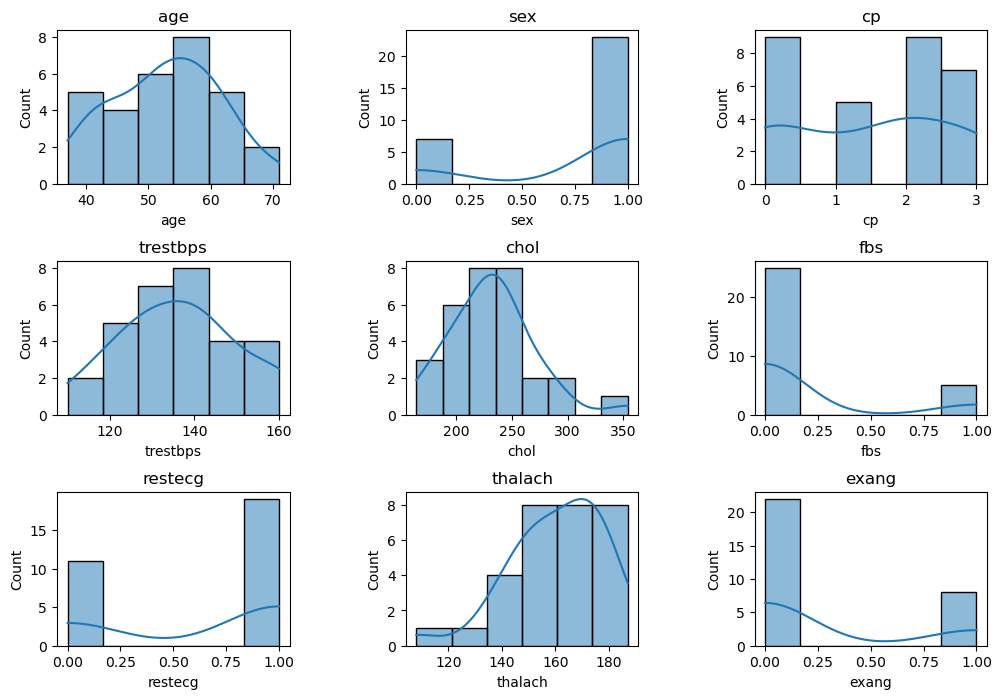

In [5]:
# Descriptive statistics
print(data.describe())

# Visualize distributions
plt.figure(figsize=(12, 8))  # Increase the figure size
nrows = 3  # Set the number of rows
ncols = 3  # Set the number of columns

for i, col in enumerate(numerical_cols):
    if i < nrows * ncols:  # Ensure we don't exceed the number of subplots
        plt.subplot(nrows, ncols, i+1)
        sns.histplot(data[col], kde=True)
        plt.title(col)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5) 
# Adjust the spacing as needed

plt.show()

**6. Visualize correlations between features and the target variable (presence or absence of heart disease)**

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


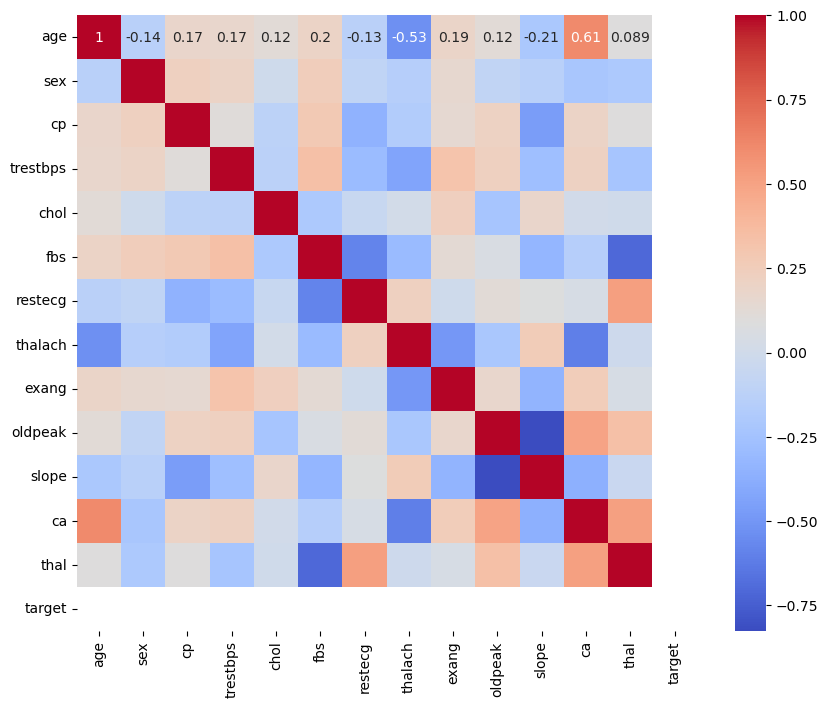

In [6]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

**7. Split the data into training and testing sets (e.g., 80% training, 20% testing)**

In [7]:
# Split data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution in the splits
print('Training class distribution:', Counter(y_train))
print('Test class distribution:', Counter(y_test))

Training class distribution: Counter({1: 24})
Test class distribution: Counter({1: 6})


**8. Train a logistic regression model on the training set**

In [8]:
# Initialize the logistic regression model with L2 regularization
model = LogisticRegression(penalty='l2', solver='liblinear')

# Train the model
model.fit(X_train, y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

**9. Ensure that you include regularization (L1, L2, or both) in your model to prevent overfitting**

In [9]:
# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

y_prob = model.predict_proba(X_test)[:, 1]

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

**10. Evaluate the model using accuracy, precision, recall, F1-score, and ROC-AUC on the test set**

In [ ]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'ROC AUC: {roc_auc}')

**11. Plot the ROC curve and calculate the AUC value.**

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**12. Interpret the coefficients of the logistic regression model.**

In [ ]:
# Get the coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Display coefficients and intercept
print('Intercept:', intercept)
print('Coefficients:')
for feature, coef in zip(range(1, len(coefficients) + 1), coefficients):
    print(f'Feature {feature}: {coef}')

# Interpretation
print("\nInterpretation:")
print("For each one-unit increase in a feature:")
for feature, coef in zip(range(1, len(coefficients) + 1), coefficients):
    print(f"Feature {feature}: {np.exp(coef):.4f} times increase in odds")

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print('Accuracy: ', accuracy_score(y_test, y_pred))

**13. Calculate the odds ratios for the features and explain what they imply about the likelihood of having heart disease**

In [ ]:
# Calculate odds ratios and interpret
odds_ratios = np.exp(coefficients)
print('\nOdds Ratios:')
for feature, odds_ratio in zip(range(1, len(odds_ratios) + 1), odds_ratios):
    print(f'Feature {feature}: {odds_ratio:.4f}')

# Interpretation
print("\nInterpretation:")
print("For each one-unit increase in a feature, the odds of having heart disease change by the corresponding odds ratio.")